In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
import plotly.express as px

In [8]:
customer  = pd.read_csv('D:/Projects/Customer Segmentation/data/customers.csv')

In [9]:
trans = pd.read_csv('D:/Projects/Customer Segmentation/data/transactions.csv')

In [10]:
customer.head()

,customer_id,name,age,gender,income,occupation,city
0,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata
1,C0002,Jessica Khan,46,M,150464,Doctor,Chennai
2,C0003,Brian Garcia,62,F,115846,Designer,Kolkata
3,C0004,Travis Santiago,43,F,136684,Teacher,Delhi
4,C0005,Rachel Rivera,37,F,170764,Software Engineer,Bangalore


In [11]:
trans.head()

,txn_id,customer_id,txn_date,txn_amount,txn_type,category,merchant_name
0,T00001,C0365,2025-04-18 09:19:36,8426.08,Credit,Travel,Swiggy
1,T00002,C0015,2025-01-31 13:51:43,3259.66,Debit,Food,Swiggy
2,T00003,C0347,2025-06-09 03:24:51,8647.30,Credit,Salary,Swiggy
3,T00004,C0101,2025-05-17 03:24:08,525.82,Debit,Travel,Flipkart
4,T00005,C0319,2025-01-16 11:38:45,8964.36,Debit,Food,Zomato


In [12]:
customer.isnull().sum()

customer_id    0
name           0
age            0
gender         0
income         0
occupation     0
city           0
dtype: int64

In [13]:
trans.isnull().sum()

txn_id           0
customer_id      0
txn_date         0
txn_amount       0
txn_type         0
category         0
merchant_name    0
dtype: int64

In [14]:
customer.duplicated().sum()

0

In [15]:
trans.duplicated().sum()

0

In [17]:
cust = customer['city'].value_counts()

In [19]:
cust

city
Chennai      95
Mumbai       87
Delhi        84
Kolkata      80
Bangalore    77
Hyderabad    77
Name: count, dtype: int64

Text(0, 0.5, 'count of city ')

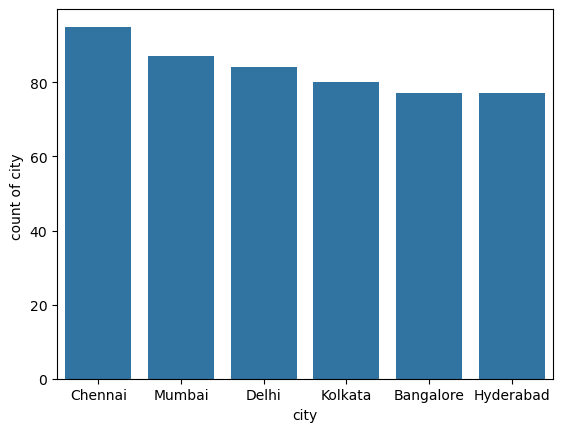

In [24]:
sns.barplot(x=cust.index , y=cust.values)
plt.ylabel("count of city ")

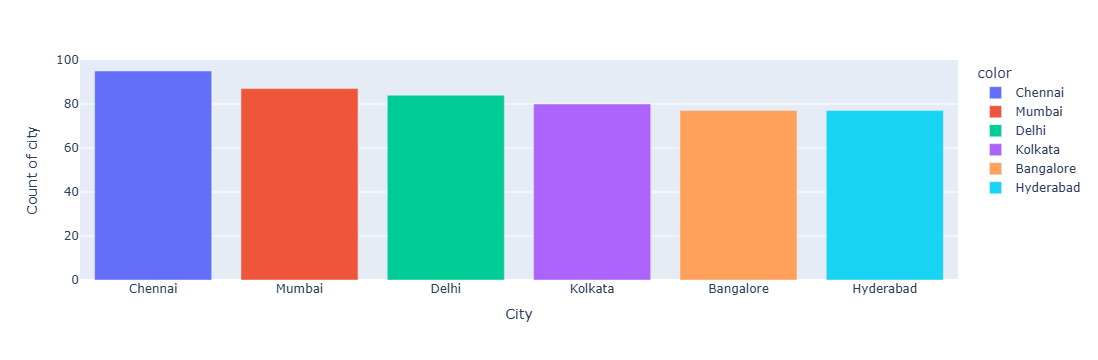

In [41]:
px.bar(x=cust.index , y=cust.values  ,labels={"x":"City " ,"y":"Count of city"}, color = cust.index)

In [28]:
occu = customer['occupation'].value_counts()

In [31]:
occu

occupation
Banker               91
Software Engineer    89
Teacher              85
Consultant           83
Designer             77
Doctor               75
Name: count, dtype: int64

In [37]:
import plotly.graph_objects as go

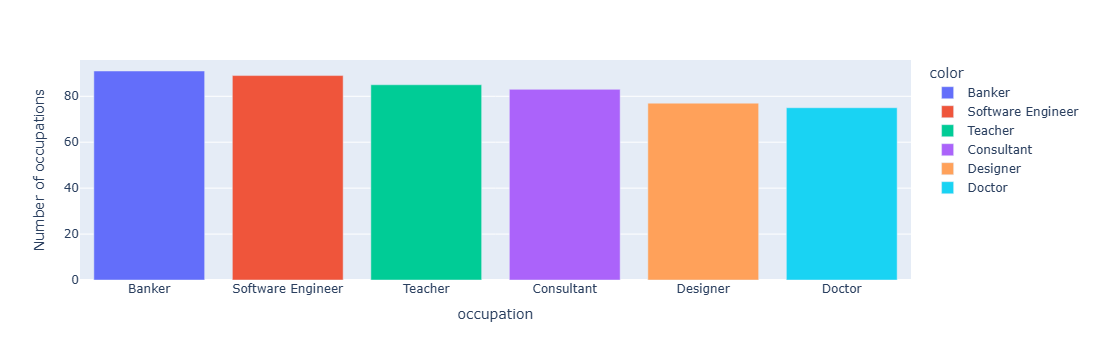

In [40]:
px.bar(x=occu.index , y=occu.values ,
       labels={"x":"occupation" , "y":"Number of occupations"} , color=occu.index )

In [42]:
customer.head()

,customer_id,name,age,gender,income,occupation,city
0,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata
1,C0002,Jessica Khan,46,M,150464,Doctor,Chennai
2,C0003,Brian Garcia,62,F,115846,Designer,Kolkata
3,C0004,Travis Santiago,43,F,136684,Teacher,Delhi
4,C0005,Rachel Rivera,37,F,170764,Software Engineer,Bangalore


In [45]:
customer.groupby(['city' ,'occupation'])['occupation'].count()

city       occupation       
Bangalore  Banker                8
           Consultant           10
           Designer             10
           Doctor               17
           Software Engineer    17
           Teacher              15
Chennai    Banker               19
           Consultant           16
           Designer             15
           Doctor                9
           Software Engineer    19
           Teacher              17
Delhi      Banker               17
           Consultant           19
           Designer              9
           Doctor               10
           Software Engineer    13
           Teacher              16
Hyderabad  Banker                9
           Consultant           12
           Designer             12
           Doctor               13
           Software Engineer    18
           Teacher              13
Kolkata    Banker               19
           Consultant           13
           Designer             15
           Doctor         

In [46]:
pd.crosstab(customer['occupation'] , customer['city'])

city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
occupation,,,,,,
Banker,8,19,17,9,19,19
Consultant,10,16,19,12,13,13
Designer,10,15,9,12,15,16
Doctor,17,9,10,13,12,14
Software Engineer,17,19,13,18,8,14
Teacher,15,17,16,13,13,11


In [50]:
salary = customer.groupby('occupation')['income'].sum().sort_index(ascending=True)

In [51]:
salary

occupation
Banker               10506403
Consultant            9377264
Designer              8975988
Doctor                7885953
Software Engineer    10549693
Teacher               9489152
Name: income, dtype: int64

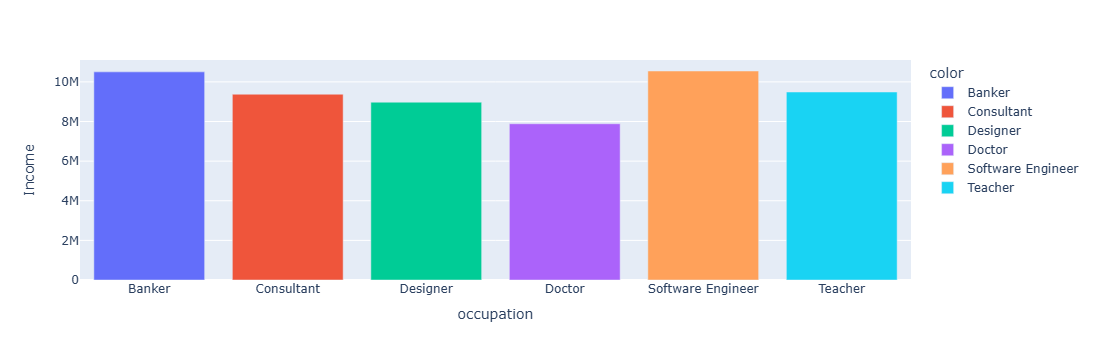

In [53]:
px.bar(x=salary.index , y=salary.values , color = salary.index , labels={"x":"occupation" ,"y":"Income"})

In [60]:
customer.groupby(['city' ,'occupation'])['income'].sum().sort_index(ascending=True)

city       occupation       
Bangalore  Banker                897286
           Consultant            929863
           Designer             1035708
           Doctor               2028488
           Software Engineer    1953549
           Teacher              2101417
Chennai    Banker               2188717
           Consultant           2294739
           Designer             1690920
           Doctor                995843
           Software Engineer    2332741
           Teacher              1753596
Delhi      Banker               1831741
           Consultant           2090403
           Designer              967144
           Doctor                846468
           Software Engineer    1582324
           Teacher              1752489
Hyderabad  Banker                714725
           Consultant           1374639
           Designer             1422530
           Doctor               1337664
           Software Engineer    2292461
           Teacher              1274209
Kolkata    

<Axes: xlabel='city', ylabel='income'>

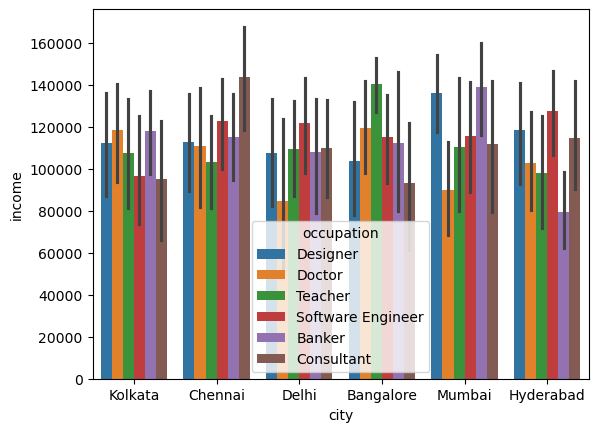

In [64]:
sns.barplot(data= customer , x='city' , y='income' , hue='occupation')

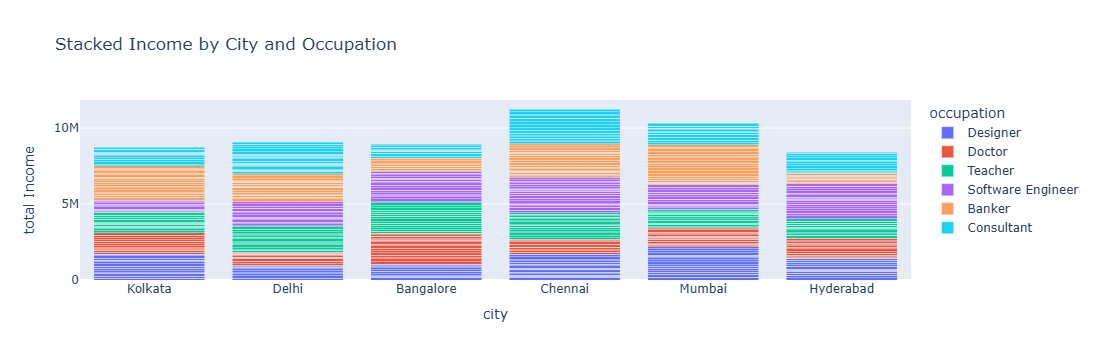

In [65]:
b = px.bar(customer , x='city' , y='income' , color = 'occupation' , barmode='stack' , 
title="Stacked Income by City and Occupation" , 
labels={"income":"total Income"})
b.show()

In [66]:
customer.head()

,customer_id,name,age,gender,income,occupation,city
0,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata
1,C0002,Jessica Khan,46,M,150464,Doctor,Chennai
2,C0003,Brian Garcia,62,F,115846,Designer,Kolkata
3,C0004,Travis Santiago,43,F,136684,Teacher,Delhi
4,C0005,Rachel Rivera,37,F,170764,Software Engineer,Bangalore


In [78]:
cust_age = customer.groupby('occupation')['age'].mean().round()

In [79]:
cust_age

occupation
Banker               41.0
Consultant           42.0
Designer             42.0
Doctor               46.0
Software Engineer    44.0
Teacher              42.0
Name: age, dtype: float64

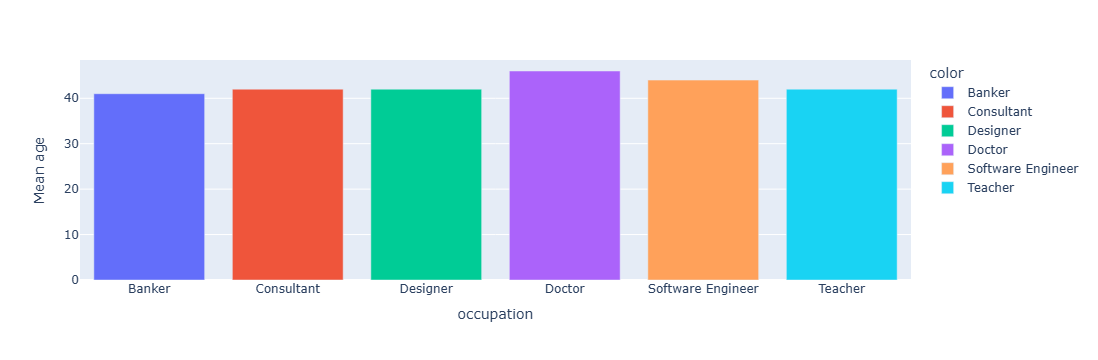

In [80]:
px.bar(x=cust_age.index , y=cust_age.values ,
       labels={"x":"occupation" , "y":"Mean age "}  , 
       color = cust_age.index)

In [84]:
income_occ = customer[customer['income']>150000][['occupation' , 'income']]

In [85]:
income_occ.head()

,occupation,income
1,Doctor,150464
4,Software Engineer,170764
6,Software Engineer,155546
10,Designer,180379
13,Doctor,179351


In [88]:
averge_income = income_occ.groupby('occupation')['income'].mean()

In [89]:
averge_income

occupation
Banker               179310.173913
Consultant           175345.250000
Designer             171103.142857
Doctor               171467.941176
Software Engineer    170106.448276
Teacher              174463.150000
Name: income, dtype: float64

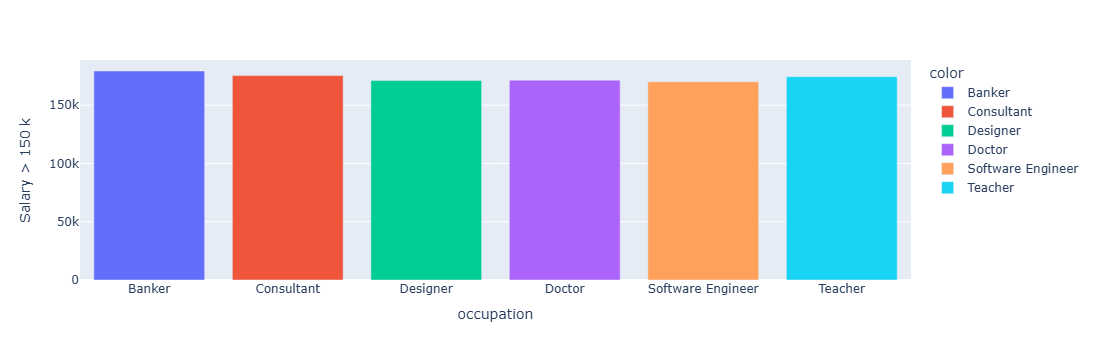

In [91]:
px.bar(x=averge_income.index , y=averge_income.values ,
       color = averge_income.index , 
       labels={"x":"occupation" , "y":"Salary > 150 k "})

In [93]:
gender = customer['gender'].value_counts()

In [94]:
gender

gender
F    264
M    236
Name: count, dtype: int64

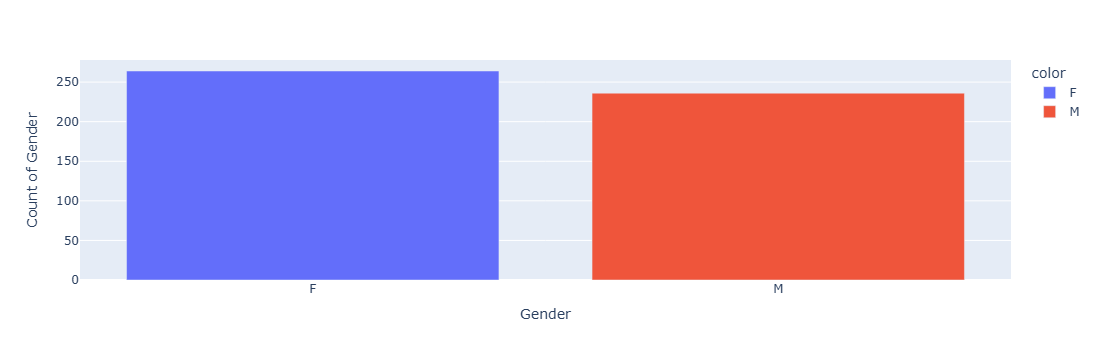

In [95]:
px.bar(x=gender.index , y=gender.values , 
       labels={"x":"Gender" , "y":"Count of Gender"} , 
       color = gender.index)

In [103]:
count_gender = customer.groupby(['occupation' , 'gender'])['gender'].count().reset_index(name ='count')

In [104]:
count_gender

,occupation,gender,count
0,Banker,F,50
1,Banker,M,41
2,Consultant,F,49
3,Consultant,M,34
4,Designer,F,43
5,Designer,M,34
6,Doctor,F,34
7,Doctor,M,41
8,Software Engineer,F,44
9,Software Engineer,M,45


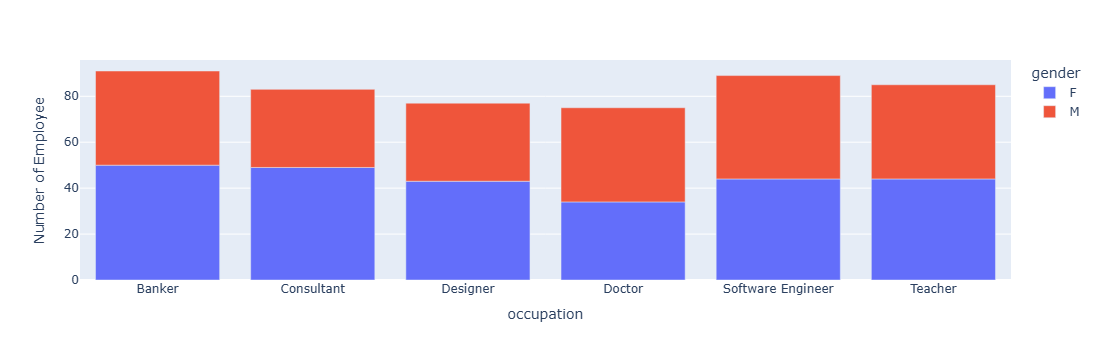

In [106]:
px.bar(count_gender , x='occupation' ,  y='count'  , color ='gender' , labels={"count":"Number of Employee"})

In [107]:
customer.head()

,customer_id,name,age,gender,income,occupation,city
0,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata
1,C0002,Jessica Khan,46,M,150464,Doctor,Chennai
2,C0003,Brian Garcia,62,F,115846,Designer,Kolkata
3,C0004,Travis Santiago,43,F,136684,Teacher,Delhi
4,C0005,Rachel Rivera,37,F,170764,Software Engineer,Bangalore


In [110]:
income_by_name = customer.groupby('name')['income'].sum().reset_index()
high_income_names = income_by_name[income_by_name['income'] > 150000]
print(high_income_names['name'])


0           Aaron Carter
3            Adam Harris
10           Alan Monroe
11        Alejandro Cook
13           Alicia Ruiz
             ...        
480      Veronica Nelson
482    Victoria Gonzalez
483      Walter Jacobson
488        William Bryan
491    William Stevenson
Name: name, Length: 139, dtype: object


In [ ]:
Lets talk about the transaction 

In [111]:
trans.head()

,txn_id,customer_id,txn_date,txn_amount,txn_type,category,merchant_name
0,T00001,C0365,2025-04-18 09:19:36,8426.08,Credit,Travel,Swiggy
1,T00002,C0015,2025-01-31 13:51:43,3259.66,Debit,Food,Swiggy
2,T00003,C0347,2025-06-09 03:24:51,8647.30,Credit,Salary,Swiggy
3,T00004,C0101,2025-05-17 03:24:08,525.82,Debit,Travel,Flipkart
4,T00005,C0319,2025-01-16 11:38:45,8964.36,Debit,Food,Zomato


In [112]:
trans.shape

(10000, 7)

In [113]:
customer.shape

(500, 7)

In [115]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   txn_id         10000 non-null  object 
 1   customer_id    10000 non-null  object 
 2   txn_date       10000 non-null  object 
 3   txn_amount     10000 non-null  float64
 4   txn_type       10000 non-null  object 
 5   category       10000 non-null  object 
 6   merchant_name  10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [116]:
trans.describe()

,txn_amount
count,10000.000000
mean,5012.493023
std,2883.344324
min,50.340000
25%,2489.452500
50%,4962.725000
75%,7552.082500
max,9999.910000


In [119]:
category = trans['category'].value_counts()

In [120]:
category

category
Bills         1720
Healthcare    1680
Travel        1674
Shopping      1657
Salary        1652
Food          1617
Name: count, dtype: int64

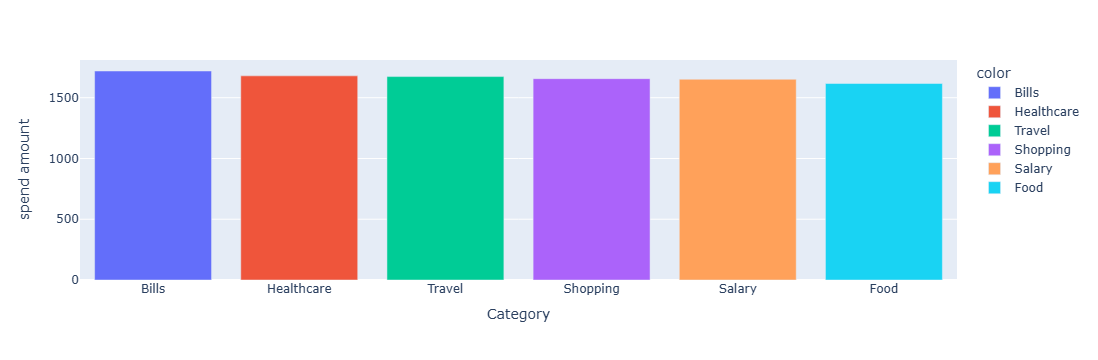

In [122]:
px.bar(x=category.index , 
      y= category.values ,
      color = category.index ,
      labels={"x":"Category" , "y":"spend amount"})

In [124]:
types_card = trans['txn_type'].value_counts()

In [125]:
types_card

txn_type
Credit    5026
Debit     4974
Name: count, dtype: int64

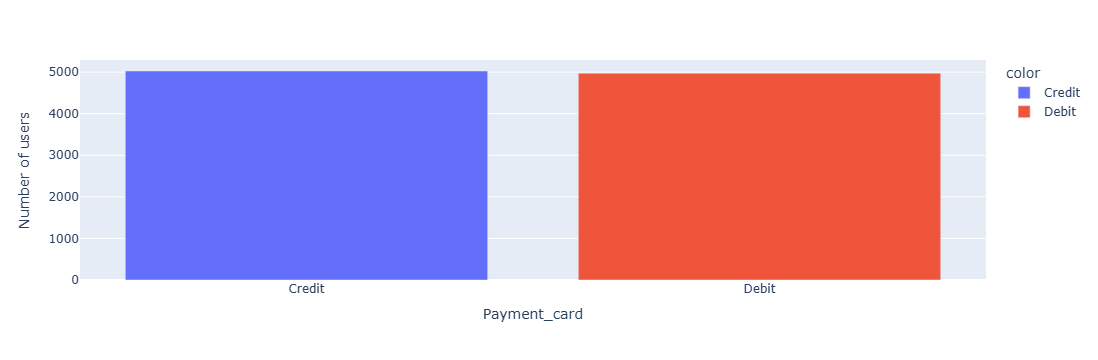

In [126]:
px.bar(x=types_card.index , y=types_card.values  ,
      labels={"x":"Payment_card" , "y":"Number of users"} ,
      color = types_card.index)

In [131]:
trans.head()

,txn_id,customer_id,txn_date,txn_amount,txn_type,category,merchant_name
0,T00001,C0365,2025-04-18 09:19:36,8426.08,Credit,Travel,Swiggy
1,T00002,C0015,2025-01-31 13:51:43,3259.66,Debit,Food,Swiggy
2,T00003,C0347,2025-06-09 03:24:51,8647.30,Credit,Salary,Swiggy
3,T00004,C0101,2025-05-17 03:24:08,525.82,Debit,Travel,Flipkart
4,T00005,C0319,2025-01-16 11:38:45,8964.36,Debit,Food,Zomato


In [132]:
transaction = trans['merchant_name'].value_counts()

In [133]:
transaction

merchant_name
Paytm            1473
Zomato           1452
Swiggy           1439
Amazon           1421
Goldman Sachs    1410
Uber             1404
Flipkart         1401
Name: count, dtype: int64

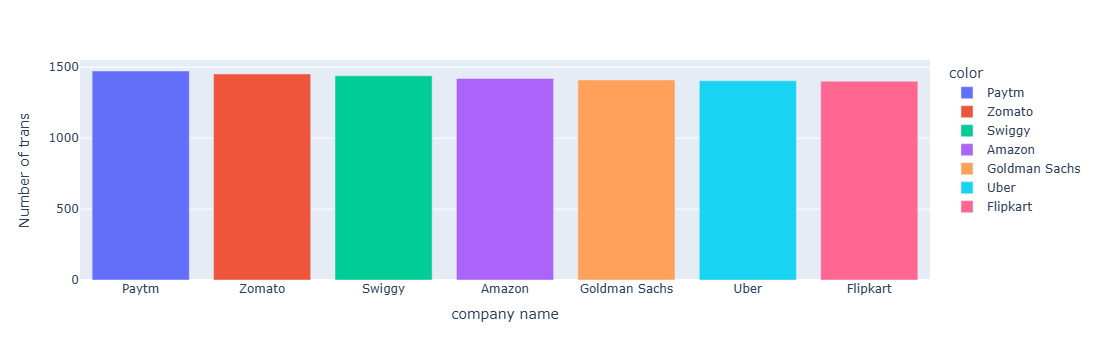

In [135]:
px.bar(x=transaction.index , y=transaction.values , labels={"x":"company name" ,"y":"Number of trans"} , color = transaction.index)

In [136]:
trans['category'].value_counts()

category
Bills         1720
Healthcare    1680
Travel        1674
Shopping      1657
Salary        1652
Food          1617
Name: count, dtype: int64

In [141]:
merchant_category = trans.groupby(['merchant_name','category'])['category'].count().reset_index(name='count')

In [144]:
merchant_category.head()

,merchant_name,category,count
0,Amazon,Bills,236
1,Amazon,Food,212
2,Amazon,Healthcare,262
3,Amazon,Salary,219
4,Amazon,Shopping,252


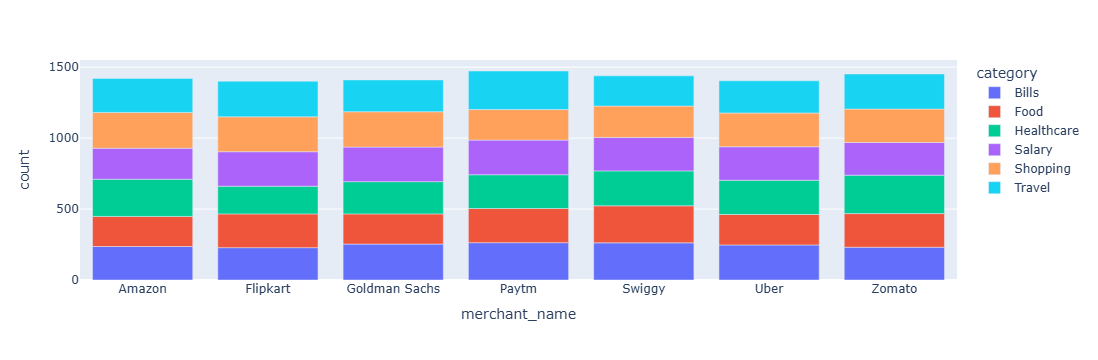

In [143]:
px.bar(merchant_category , 
       x='merchant_name' ,
       y='count' ,color = 'category' )

In [145]:
trans.head()

,txn_id,customer_id,txn_date,txn_amount,txn_type,category,merchant_name
0,T00001,C0365,2025-04-18 09:19:36,8426.08,Credit,Travel,Swiggy
1,T00002,C0015,2025-01-31 13:51:43,3259.66,Debit,Food,Swiggy
2,T00003,C0347,2025-06-09 03:24:51,8647.30,Credit,Salary,Swiggy
3,T00004,C0101,2025-05-17 03:24:08,525.82,Debit,Travel,Flipkart
4,T00005,C0319,2025-01-16 11:38:45,8964.36,Debit,Food,Zomato


In [150]:
credit_category = trans.groupby(['category' ,'txn_type' ])['txn_type'].count().reset_index(name='count')

In [151]:
credit_category

,category,txn_type,count
0,Bills,Credit,833
1,Bills,Debit,887
2,Food,Credit,848
3,Food,Debit,769
4,Healthcare,Credit,834
5,Healthcare,Debit,846
6,Salary,Credit,814
7,Salary,Debit,838
8,Shopping,Credit,845
9,Shopping,Debit,812


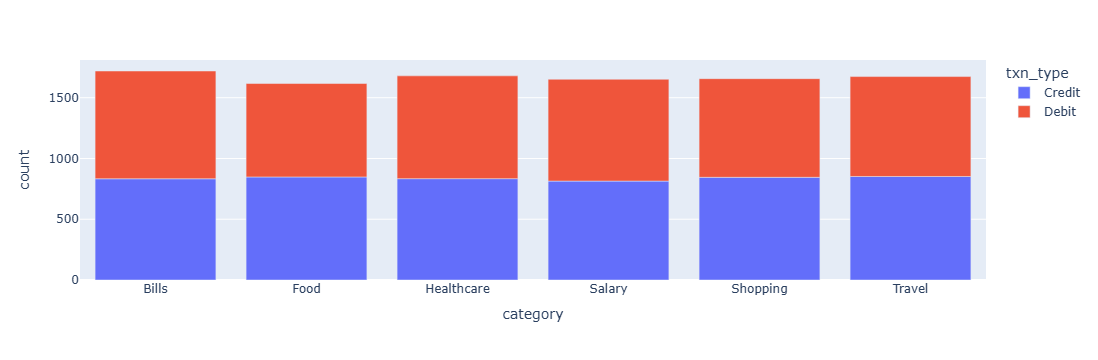

In [148]:
px.bar(credit_category , x='category' , y='count' , color = 'txn_type')

In [152]:
trans.head()

,txn_id,customer_id,txn_date,txn_amount,txn_type,category,merchant_name
0,T00001,C0365,2025-04-18 09:19:36,8426.08,Credit,Travel,Swiggy
1,T00002,C0015,2025-01-31 13:51:43,3259.66,Debit,Food,Swiggy
2,T00003,C0347,2025-06-09 03:24:51,8647.30,Credit,Salary,Swiggy
3,T00004,C0101,2025-05-17 03:24:08,525.82,Debit,Travel,Flipkart
4,T00005,C0319,2025-01-16 11:38:45,8964.36,Debit,Food,Zomato


In [156]:
trans[trans['txn_amount']==9999.91]

,txn_id,customer_id,txn_date,txn_amount,txn_type,category,merchant_name
541,T00542,C0226,2025-06-28 13:13:23,9999.91,Debit,Travel,Paytm


In [155]:
trans['txn_amount'].max()

9999.91

In [157]:
merged = pd.merge(customer, trans, on='customer_id')

In [158]:
merged.shape

(10000, 13)

In [159]:
merged.head()

,customer_id,name,age,gender,income,occupation,city,txn_id,txn_date,txn_amount,txn_type,category,merchant_name
0,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T01930,2025-07-04 07:44:31,5514.86,Debit,Healthcare,Flipkart
1,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T02146,2025-01-25 14:40:31,7377.88,Debit,Salary,Flipkart
2,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T02430,2025-06-29 18:08:19,8031.14,Credit,Travel,Zomato
3,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T02962,2025-05-26 06:52:29,4477.04,Debit,Food,Goldman Sachs
4,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T03087,2025-01-13 13:34:56,3603.17,Credit,Food,Uber


In [162]:
occu_type = merged.groupby(['occupation' , 'txn_type'])['txn_type'].count().reset_index(name = 'count')

In [163]:
occu_type

,occupation,txn_type,count
0,Banker,Credit,915
1,Banker,Debit,895
2,Consultant,Credit,795
3,Consultant,Debit,835
4,Designer,Credit,781
5,Designer,Debit,755
6,Doctor,Credit,744
7,Doctor,Debit,718
8,Software Engineer,Credit,949
9,Software Engineer,Debit,916


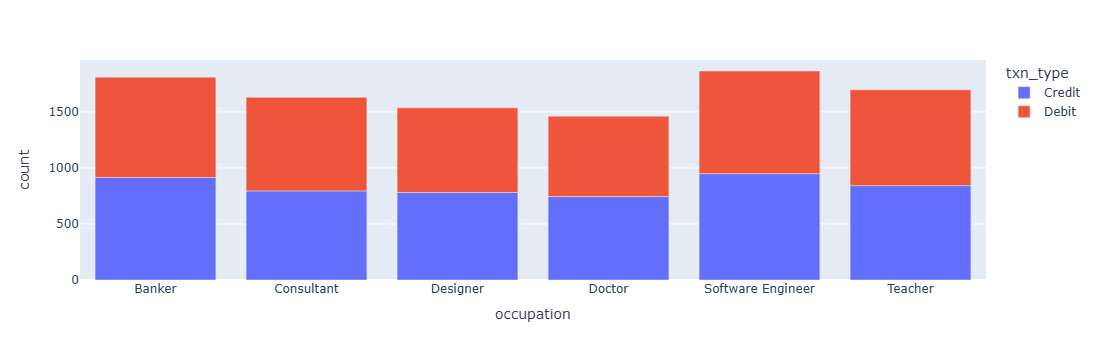

In [164]:
px.bar(occu_type ,x='occupation' ,
      y='count' , color = 'txn_type')

In [169]:
city_category = merged.groupby(['city' , 'category'])['category'].count().reset_index(name = 'count').sort_index(ascending = False)

In [170]:
city_category

,city,category,count
35,Mumbai,Travel,302
34,Mumbai,Shopping,290
33,Mumbai,Salary,261
32,Mumbai,Healthcare,259
31,Mumbai,Food,299
30,Mumbai,Bills,285
29,Kolkata,Travel,274
28,Kolkata,Shopping,273
27,Kolkata,Salary,248
26,Kolkata,Healthcare,271


In [174]:
merged.groupby(['age' , 'category'])['category'].count().reset_index(name='count').head()

,age,category,count
0,18,Bills,54
1,18,Food,37
2,18,Healthcare,51
3,18,Salary,41
4,18,Shopping,38


In [176]:
merged.groupby(['city' , 'merchant_name'])['merchant_name'].count().reset_index(name = 'count').head()

,city,merchant_name,count
0,Bangalore,Amazon,227
1,Bangalore,Flipkart,218
2,Bangalore,Goldman Sachs,226
3,Bangalore,Paytm,217
4,Bangalore,Swiggy,202


In [178]:
merged.columns

Index(['customer_id', 'name', 'age', 'gender', 'income', 'occupation', 'city',
       'txn_id', 'txn_date', 'txn_amount', 'txn_type', 'category',
       'merchant_name'],
      dtype='object')

In [179]:
merged.head()

,customer_id,name,age,gender,income,occupation,city,txn_id,txn_date,txn_amount,txn_type,category,merchant_name
0,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T01930,2025-07-04 07:44:31,5514.86,Debit,Healthcare,Flipkart
1,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T02146,2025-01-25 14:40:31,7377.88,Debit,Salary,Flipkart
2,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T02430,2025-06-29 18:08:19,8031.14,Credit,Travel,Zomato
3,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T02962,2025-05-26 06:52:29,4477.04,Debit,Food,Goldman Sachs
4,C0001,Stacy Wilson,45,F,127691,Designer,Kolkata,T03087,2025-01-13 13:34:56,3603.17,Credit,Food,Uber


In [180]:
merged.to_csv('merged.csv')